In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Moving up to the parent directory")
print(os.getcwd())

The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project\notebooks
Moving up to the parent directory
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project


In [2]:
from stage0_configs import *
from modules.SOO_SIM import *
from modules.helper import *
from modules.hardeningLaws import *
info = main_config()


Welcome to the Abaqus parameter calibration project


The configurations you have chosen: 

+------------------------+-------------+
|     Global Configs     | User choice |
+------------------------+-------------+
| Number of initial sims |     100     |
|  Initial sims spacing  |    10000    |
|   Optimize strategy    |     SOO     |
|        Material        | DP1000_room |
|     Hardening law      |  SwiftVoce  |
|        Geometry        |    NDBR50   |
|      Curve index       |      2      |
|     Optimizer name     |      BO     |
|   Deviation percent    |      5      |
+------------------------+-------------+

Generating necessary directories

The path to your main project folder is

c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project



[{'c1': 0.8400840084008401, 'c2': 449.25492549254926, 'c3': 0.09965996599659967, 'c4': 0.038003800380038005, 'c5': 1687.798779877988, 'c6': 536.2736273627363, 'c7': 249.07650765076505}, {'c1': 0.5233523352335234, 'c2': 835.3735373537354, 'c3': 0.04684468446844685, 'c4': 0.35313531353135313, 'c5': 1381.6781678167818, 'c6': 232.3132313231323, 'c7': 666.5004500450044}, {'c1': 0.35473547354735474, 'c2': 1815.871587158716, 'c3': 0.07763776377637764, 'c4': 0.722972297229723, 'c5': 254.67546754675467, 'c6': 115.75157515751576, 'c7': 936.1575157515751}, {'c1': 0.6278627862786279, 'c2': 1431.2731273127313, 'c3': 0.07076707670767077, 'c4': 0.24842484248424843, 'c5': 614.001400140014, 'c6': 804.6804680468047, 'c7': 713.2583258325832}, {'c1': 0.5416541654165417, 'c2': 1312.5112511251125, 'c3': 0.06454645464546455, 'c4': 0.8827882788278828, 'c5': 909.2909290929093, 'c6': 284.9684968496849, 'c7': 465.48154815481547}, {'c1': 0.21942194219421943, 'c2': 871.8571857185719, 'c3': 0.09612961296129613, 'c4

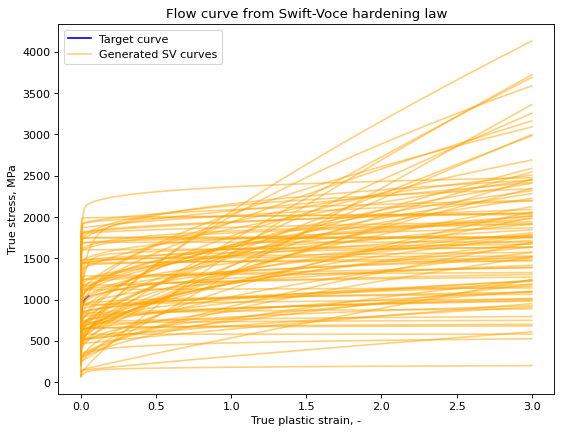

In [17]:
sim = SOO_SIM(info)
targetCurve = pd.read_csv(f"SOO_targets/DP1000_flowCurve/flowCurve.csv")
targetStrain = targetCurve["strain/-"]
targetStress = targetCurve["stress/MPa"]
paramsDict = sim.latin_hypercube_sampling()
print(paramsDict)
truePlasticStrain = info['truePlasticStrain']
# Plot the flow curve
figure(figsize=(8, 6), dpi=80)
plt.title("Flow curve from Swift-Voce hardening law")
plt.xlabel("True plastic strain, -")
plt.ylabel("True stress, MPa")
plt.plot(targetStrain, targetStress, color="blue", label="Target curve")
#plt.xlim(0, 0.06)
for param in paramsDict:
    trueStress = SwiftVoce(param["c1"], param["c2"], param["c3"], param["c4"], param["c5"], param["c6"], param["c7"], truePlasticStrain)
    plt.plot(truePlasticStrain, trueStress, color="orange", alpha=0.5)
plt.plot([], [], color="orange", alpha=0.5, label="Generated SV curves")
plt.legend()
np.save("parameters.npy", paramsDict)